## Entropy

**Entropy in information theory**: (*unpredictable*) things convey more information.
For Example in *coin flip*:

$P(heads) = 0.5$,  $P(tails) = 0.5$, and total $P(u) = 1$

This event will have high entropy, because of the more unpredictability.

$$H = - \sum_{i=1}^{n}p(x_i) \times log_2(p(x_i))$$

$x = $ Data Values

$p = $ Probability

In [73]:
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import string

In [13]:
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

text = book.text

In [18]:
strings2replace = [
    "\r\n\r\nâ\x80\x9c",  # new paragraph
    "â\x80\x9c",  # open quote
    "â\x80\x9d",  # close quote
    "\r\n",  # new line
    "â\x80\x94",  # hyphen
    "â\x80\x99",  # single apostrophe
    "â\x80\x98",  # single quote
    "_",  # underscore, used for stressing
]

In [21]:
for str2match in strings2replace:
  regexp = re.compile(r'%s'%str2match)
  text = regexp.sub(' ',text)

In [36]:
words = text.split(' ')
words_length = np.zeros(len(words))

for i in range(len(words)):
  words_length[i] = len(words[i])

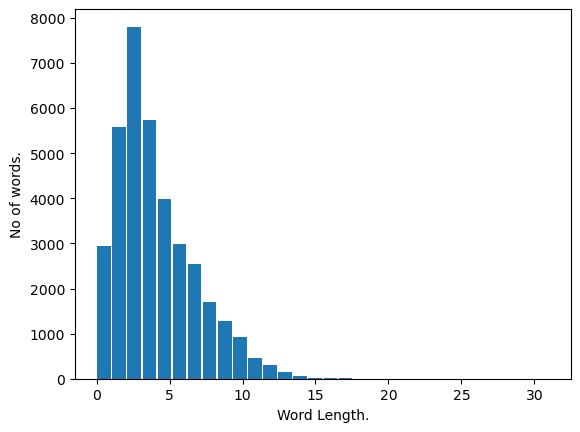

In [57]:
plt.hist(words_length, bins=30, rwidth=.9)

plt.xlabel("Word Length.")
plt.ylabel("No of words.")
plt.show()

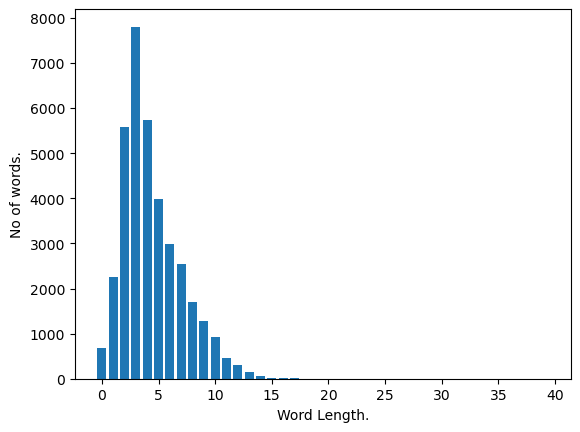

In [58]:
wordcounts = np.zeros(40)

for word in words:
  wordcounts[len(word)] += 1

plt.bar(range(40), wordcounts)

plt.xlabel("Word Length.")
plt.ylabel("No of words.")
plt.show()

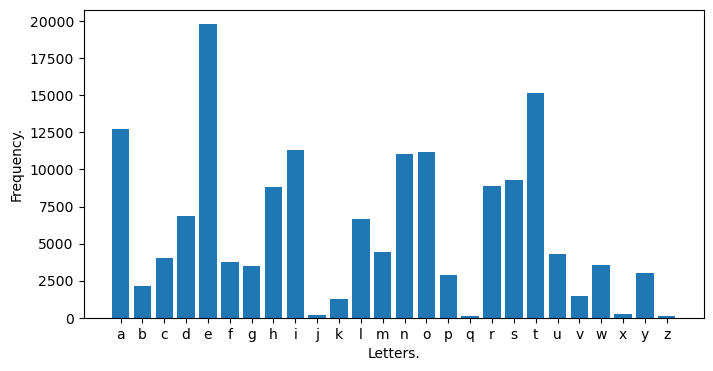

In [71]:
letter_counts = np.zeros(26)

for letter in text:
  letter = letter.lower()
  if ord(letter) >= 97 and ord(letter) <= 122: 
    letter_counts[ord(letter) - 97] += 1
    

plt.figure(figsize=(8, 4))
plt.bar(range(26), letter_counts)

plt.xlabel("Letters.")
plt.ylabel("Frequency.")
plt.xticks(ticks=range(26), labels=[chr(i) for i in range(97, 123)])

plt.show()

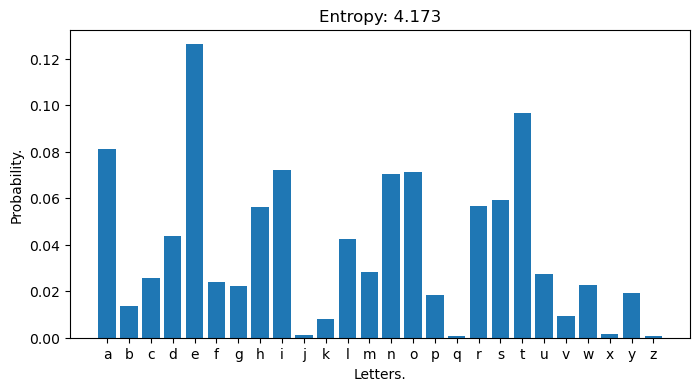

In [84]:
# Calculating the probabilities and entropy
letter_probabilities = np.zeros(26)
letters = string.ascii_lowercase
total_letters_count = sum(1 for char in text.lower() if char in letters)

for i, letter in enumerate(letters):
  letter_count = text.lower().count(letter)
  letter_probabilities[i] = letter_count / total_letters_count


# see the formula at the top
entropy = -np.sum(letter_probabilities * np.log2(letter_probabilities))

plt.figure(figsize=(8, 4))
plt.bar(range(26), letter_probabilities)

plt.xlabel("Letters.")
plt.ylabel("Probability.")
plt.title("Entropy: %.3f"%entropy)
plt.xticks(ticks=range(26), labels=letters)
plt.show()

### Conditional Entropy.

In [87]:
numletters = len(letters)
probmat = np.zeros((numletters, numletters))

for i in range(len(text) - 1):
  curr_letter = text[i]
  next_letter = text[i + 1]
  if curr_letter in letters and next_letter in letters:
    probmat[letters.index(curr_letter), letters.index(next_letter)] += 1

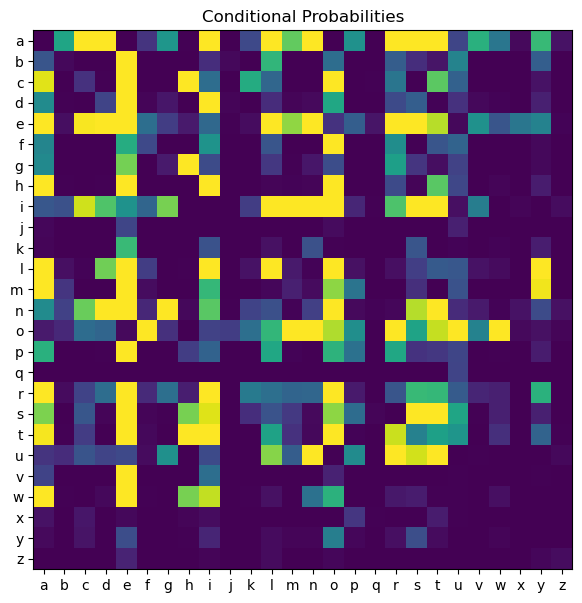

In [98]:
plt.figure(figsize=(7, 7))
plt.imshow(probmat, vmax=500)

plt.xticks(range(26), letters)
plt.yticks(range(26), letters)

plt.title("Conditional Probabilities")
plt.show()

In [108]:
conditional_entropy = np.zeros(numletters)

for i in range(numletters):
  probs = probmat[i,:]
  probs = probs / np.sum(probs)
  conditional_entropy[i] = - np.sum(probs * np.log2(probs + np.finfo(float).eps)) 

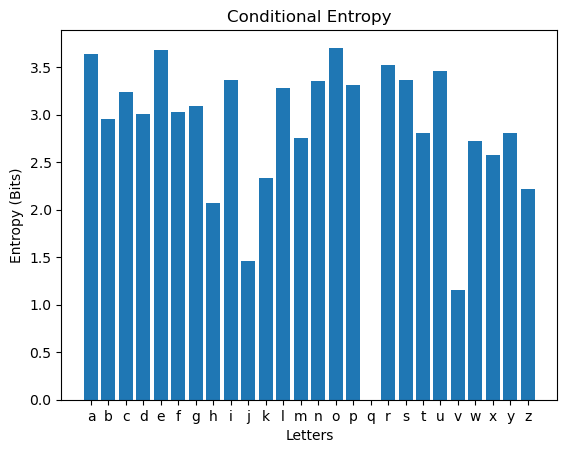

In [113]:
plt.bar(range(numletters), conditional_entropy)

plt.xlabel("Letters")
plt.ylabel("Entropy (Bits)")
plt.xticks(range(numletters), letters)
plt.title('Conditional Entropy')
plt.show()